# SDL data extraction from exel file and ploting possibly

In [1]:
import os
import csv 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tkinter import *
from tkinter import filedialog
from matplotlib import pylab as pylab
import matplotlib.gridspec as gridspec
from scipy import signal


## Modules

In [2]:
def dir_select(start_dir = None):
    '''Directory selection to later read all relevant files from directory, need tkinter and filedialog
    WARNING: do not forget '/' or '\\' (python vs win) before file name'''
    root=Tk()
    directory=filedialog.askdirectory(initialdir=start_dir)
    root.destroy()
    print(directory)
    return directory

def all_extension_select(directory, extension):
    ''' Creates list with all files pertaining to relevant extension for the folder inserted as directory'''
    all_files_names=os.listdir(directory)
#    print(all_files_names , '\n')
    txt_files=list()
    for a in range(len(all_files_names)):
        if all_files_names[a].find(extension)>0:
            txt_files.insert(a, all_files_names[a])
    print(txt_files)
    return txt_files

def textfile_to_linelist(txtfilepath):
    '''Creates a list of strings from the text file !!Give complete file path with directory'''
    with open(txtfilepath,  encoding='utf8', errors='ignore') as f:
        lines=f.readlines()
        f.close()
    return lines


In [3]:

colors=['#000000', '#aa0000', '#00aa00', '#0000aa', '#aa5500', '#aa5555', '#00aa55' ]
Dcolors={"C":"#111111", 
         "H":"#4ac9ff", 
         "N":"#3050f8", 
         "O":"#ff0d0d",
         "Na":"#ab5cf2",
         "Al":"#bfa6a6",
         "Si":"#f0c8a0",
         "S":"#ffff30",
         "Cl":"#1ff01f",
         "Ar":"#80d1e3",
         "K":"#8f40d4",
         "Ca":"#3dff00",
         "Fe":"#e06633",
         "Cu":"#c88033",
         "Mg":"#2a802a", 
         "P":"#a2b9f1"}


## Select folder

In [5]:
directory=dir_select(start_dir='/home/dasilvatousch/PydataWork')
file_extension='.xlsx'
files=all_extension_select(directory, file_extension) 


/home/dasilvatousch/PydataWork/SDL/20211206_1gL_propre
['Snoopy_21-11-09_brut.xlsx', 'Snoopy0_21-11-09_brut.xlsx']


## Split brut et pseudo

In [6]:
brut_files=list()
pseudo_files=list()
other=list()
newdirectory=list()

for each in files:
    if each.find('brut')>0:
        brut_files.append(each)
        newpath = directory + '/' + each[:-5] + '_Graphs' 
        newdirectory.append(newpath)
        if not os.path.exists(newpath):
            os.makedirs(newpath)
    elif each.find('pseudo')>0:
        pseudo_files.append(each)
    else:
        other.append(each)
print(brut_files)
print(pseudo_files)
print(other)

['Snoopy_21-11-09_brut.xlsx', 'Snoopy0_21-11-09_brut.xlsx']
[]
[]


In [10]:
xlpath=directory + '/' + brut_files[0]
#print(xlpath)
df=pd.read_excel(xlpath, sheet_name='Data', index_col='X')
elements=["C", "N", "Fe", "Si", "S", "Al", "O", "N", "H", "K", "Na"]
df.head()


col_name=list(df.columns)
print(col_name)
min_max_scaler=MinMaxScaler()
for col in col_name:
    name='n_' + col
    df[name]=(df[col]-df[col].min())/(df[col].max()-df[col].min())


i=0
col_name=list(df.columns)
for col in col_name:
    name='n_' + col
    fig = plt.plot(figsize=(10, 20))
    plt.plot(df[name], label=col, color=colors[i])
    i+=1
    plt.legend(fontsize=14)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Signal (V)', fontsize=14)
    plt.minorticks_on()
    plt.tick_params(direction='in', which='both', right=True)
    plt.title('GDOES : Raw signal')
    plt.show()

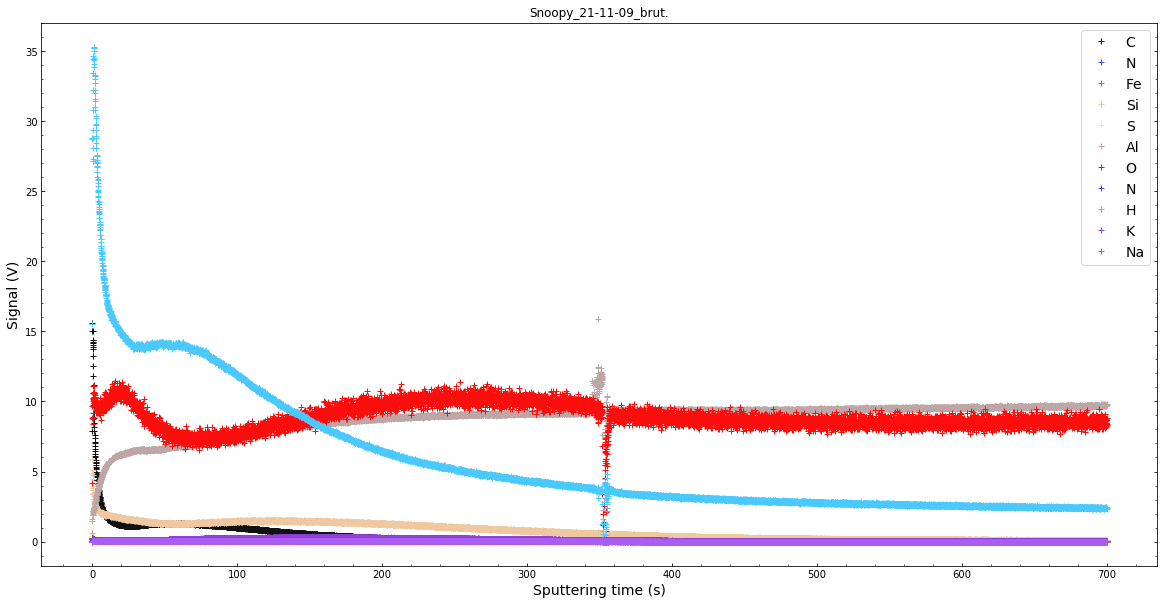

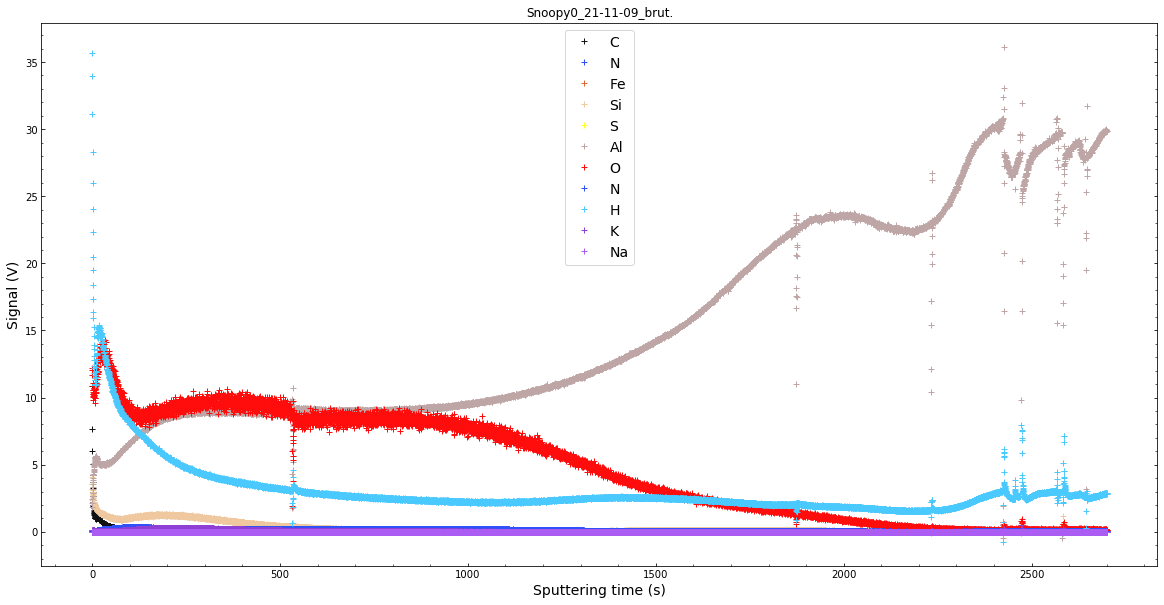

In [12]:
i=0
col_name=list(df.columns)
for file in brut_files:
    xlpath = directory + '/' + file
    
    df = pd.read_excel(xlpath, sheet_name='Data', index_col='X')
    
    col_name = list(df.columns)
    fig = plt.figure(figsize=(20,10))
    for col in elements:
        plt.plot(df[col], label=col,color=Dcolors[col], linestyle='none', marker='+')
    plt.legend(fontsize=14)
    plt.xlabel('Sputtering time (s)', fontsize=14)
    plt.ylabel('Signal (V)', fontsize=14)
    plt.minorticks_on()
    plt.tick_params(direction='in', which='both', right = True)
    plt.title(file[:-4])
    figname=newdirectory[i] + '/_All.png'
    plt.savefig(figname)
    plt.show()
    '''
    for col in col_name:
        figC=plt.figure(figsize=(20,10))
        plt.plot(df[col], label=col, color=Dcolors[col], linestyle='none', marker='+')
        plt.legend(fontsize=14)
        plt.xlabel('Sputtering time (s)', fontsize=14)
        plt.ylabel('Signal (V)', fontsize=14)
        plt.minorticks_on()
        plt.tick_params(direction='in', which='both', right = True)
        plt.title(file[:-4])
        figname=newdirectory[i] + '/' + col + '.png'
        plt.savefig(figname)
        plt.show()'''
    i+=1

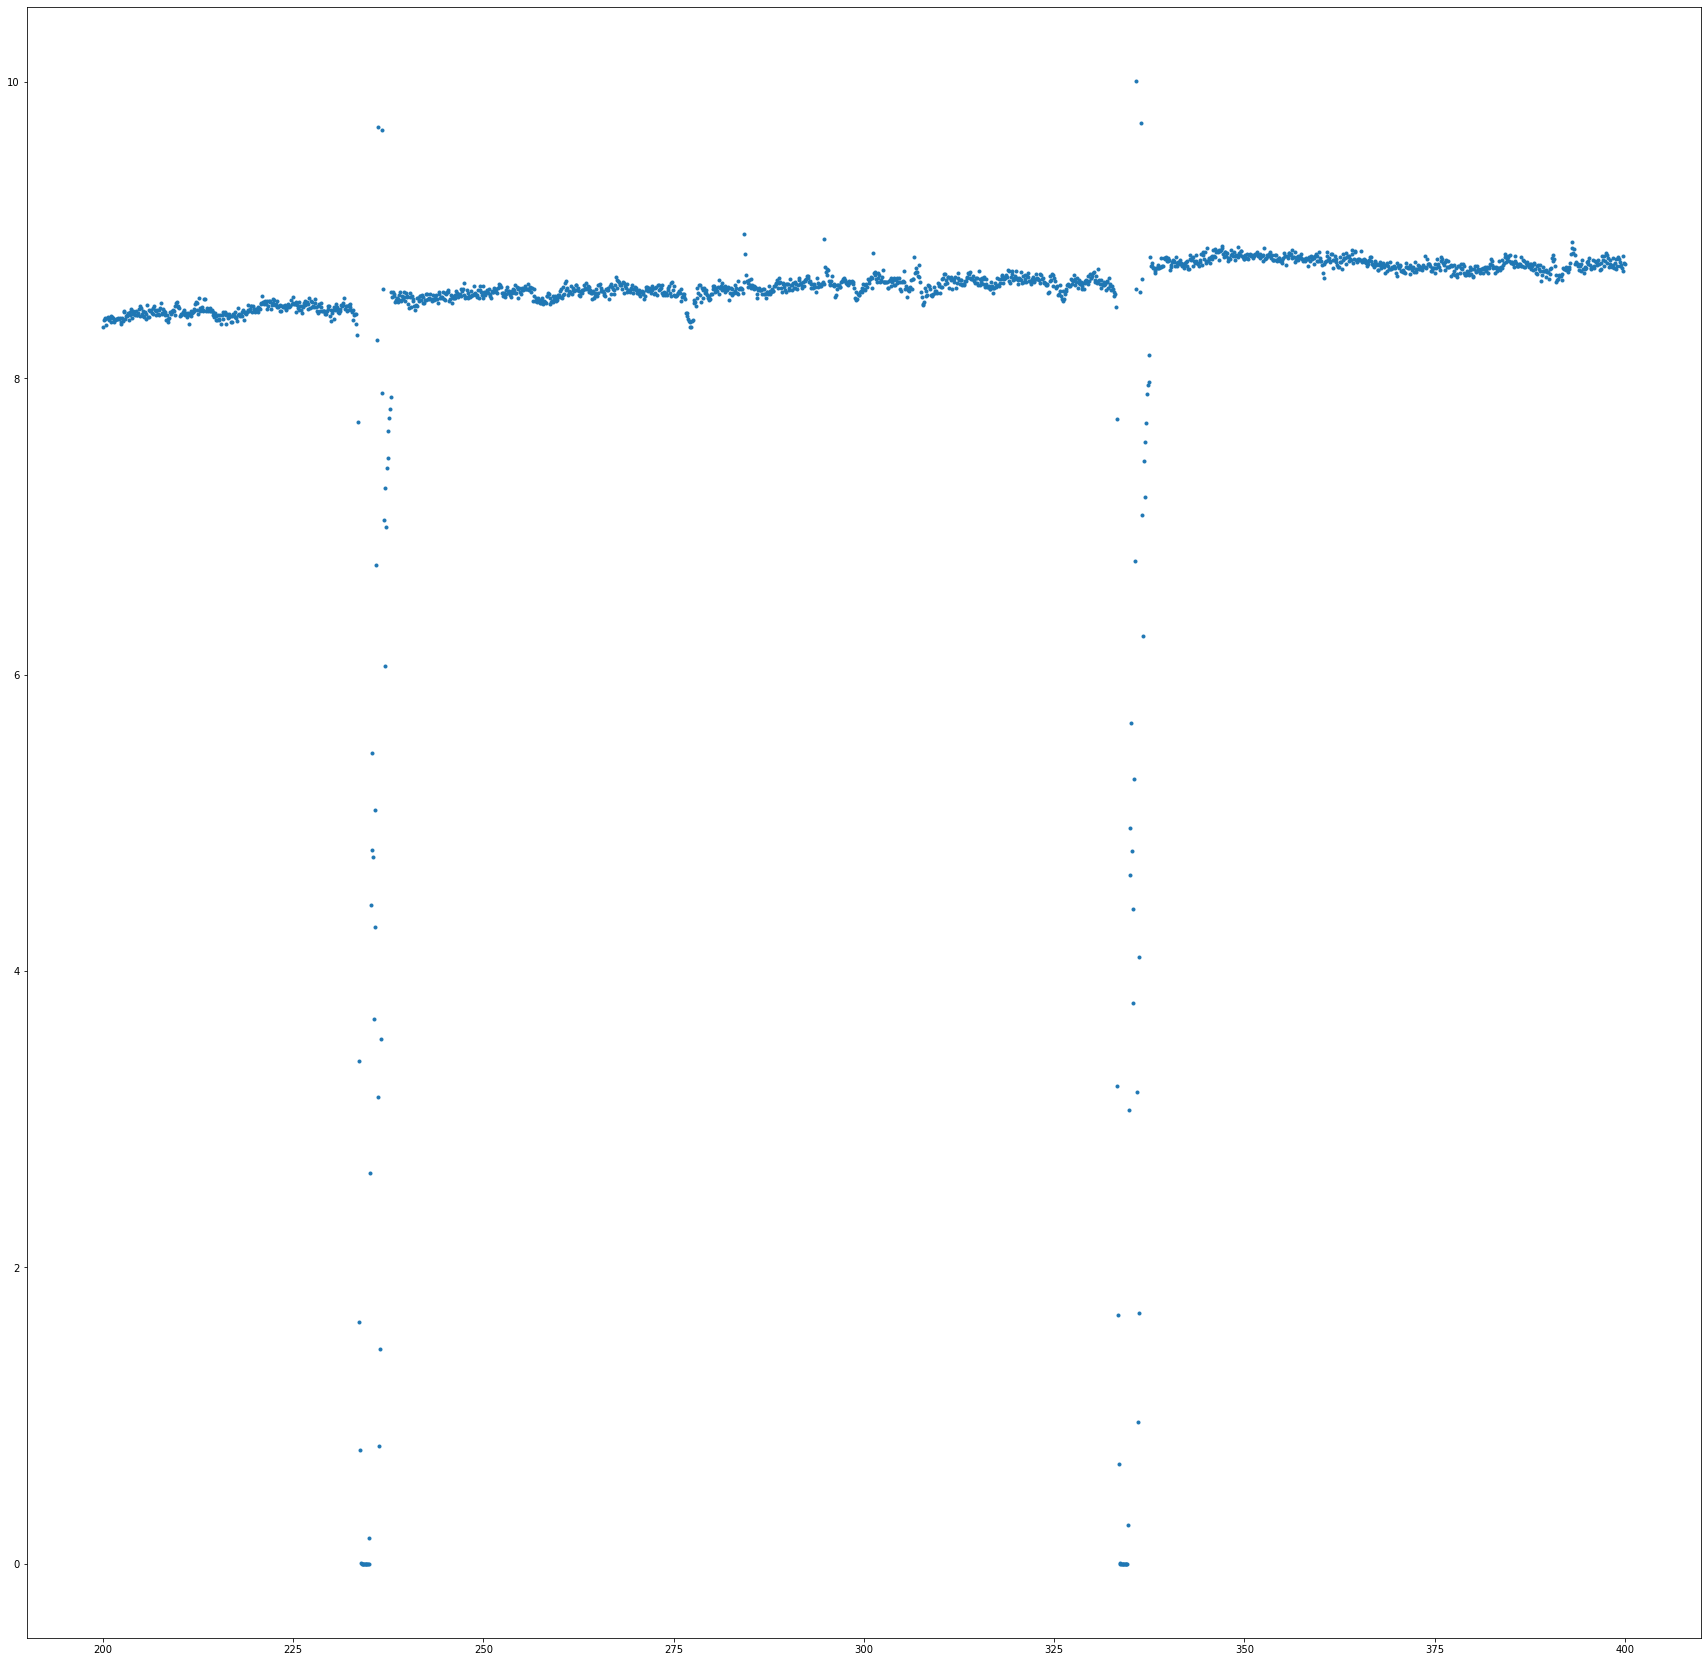